# Virtual environments and requests module

In [3]:
# sending a request and logging the response code

import requests

r = requests.get('https://api.github.com/users/Connor-SM')

print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [5]:
# accessing the content that we request from the URL
data = r.content
print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In [7]:
# converting data from JSON into a python dictionary  and outputting all key-value pairs
data = r.json() # converting the data from a string to a dictionary
for k, v in data.items():
    print('Key: {} \t Value: {}'.format(k, v))

print(data['name']) # accessing data directly

Key: login 	 Value: Connor-SM
Key: id 	 Value: 20958711
Key: node_id 	 Value: MDQ6VXNlcjIwOTU4NzEx
Key: avatar_url 	 Value: https://avatars.githubusercontent.com/u/20958711?v=4
Key: gravatar_id 	 Value: 
Key: url 	 Value: https://api.github.com/users/Connor-SM
Key: html_url 	 Value: https://github.com/Connor-SM
Key: followers_url 	 Value: https://api.github.com/users/Connor-SM/followers
Key: following_url 	 Value: https://api.github.com/users/Connor-SM/following{/other_user}
Key: gists_url 	 Value: https://api.github.com/users/Connor-SM/gists{/gist_id}
Key: starred_url 	 Value: https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key: subscriptions_url 	 Value: https://api.github.com/users/Connor-SM/subscriptions
Key: organizations_url 	 Value: https://api.github.com/users/Connor-SM/orgs
Key: repos_url 	 Value: https://api.github.com/users/Connor-SM/repos
Key: events_url 	 Value: https://api.github.com/users/Connor-SM/events{/privacy}
Key: received_events_url 	 Value: https://

In [9]:
# outputting specific key-value pairs from data
r = requests.get('https://api.github.com/search/repositories?q=language:python')
data = r.json()
print(data['total_count']) # output the total number of repositories that use python

13689753


## Pandas

In [12]:
# importing the pandas library
import pandas as pd # industry standard name of pd when importing

In [20]:
# using the from_dict method to convert a dictionary into a Pandas dataframe
import random

random.seed(3) # generate same random numbers every time, number used doesn't matter

names = ['Jess', 'Jordan', 'Sandy', 'Ted', 'Barney', 'Tyler', 'Rebecca']
ages = [random.randint(18, 35) for x in range(len(names))]

people = {'names': names, 'ages': ages}

df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [22]:
# directly selecting a column in Pandas
print(df['ages'])
print(df['ages'][3]) # select the value of ages in the fourth row (0-index based)

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [24]:
# directly selecting a record in Pandas using .loc
print(df.loc[0])
print(df.loc[0]['names']) # selecting the value at record 0 in the 'names' column

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [26]:
# slicing a DataFrame to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [28]:
# accessing the top 5 records using .head()
df.head(5)

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [30]:
# accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [32]:
# accessing the column headers (keys) using the .keys() method
headers = df.keys()
print(headers)

Index(['names', 'ages'], dtype='object')


In [34]:
# checking the number of records and columns
print(df.shape)

(7, 2)


In [36]:
# checking the general stats of the DataFrame, only works on numerical columns
df.describe

<bound method NDFrame.describe of      names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18>

In [38]:
# sort based on a column, but keep the DataFrame in tact
df = df.sort_values('ages')
df.head(5)

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [40]:
# using a conditional to create a true/false column to work with 
can_drink = df['ages'] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [42]:
# using subset to filter out records and keep dataframe intact
df[ df['ages'] > 21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [44]:
# generating a new column of fake data for each record in the DataFrame to represent customer tenure
random.seed(321)

tenure = [random.randint(0, 10) for x in range(len(df))]

df['tenure'] = tenure # same as adding a new key-value pair in a dictionary
df.head()

,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8


In [46]:
# feature engineering a new column from known data using a UDF
def ageGroup(age):
    return 'Teenager' if age < 21 else 'Adult'

df['age_group'] = df['ages'].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [48]:
# grouping the records together to count how many records in each  group
df.groupby('age_group', as_index=False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [58]:
# grouping the data to see averages of all columns
df.groupby('age_group', as_index=False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenager,2,2,2


In [62]:
# adding a record to the bottom of the DataFrame
df.loc[7] = ['Jess', 25, 2, 'Adult'] # add a record
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,Jess,25,2,Adult


In [64]:
# remove duplicates based on same names
df = df.drop_duplicates(subset='names')
df.head(8)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenager
5,Tyler,20,6,Teenager
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [66]:
# creating another fake DataFrame to work with, having same names and a new ratings column
ratings = {
    'names': ['Jess', 'Tyler', 'Ted'],
    'ratings': [10, 9, 6]
}
ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [68]:
# performing an inner join with our df and ratings DataFrames based on names, get data that matches
matched_ratings = df.merge(ratings, on='names', how='inner')
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenager,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


In [72]:
# performing an outer join with our df and ratings DataFrames based on names, get all data
all_ratings = df.merge(ratings, on='names', how='outer')
all_ratings.head()

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenager,NaN
1,Tyler,20,6,Teenager,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0


# Matplotlib

In [77]:
# importing the matplotlib library
from matplotlib import pyplot as plt # standard industry name of plt when importing

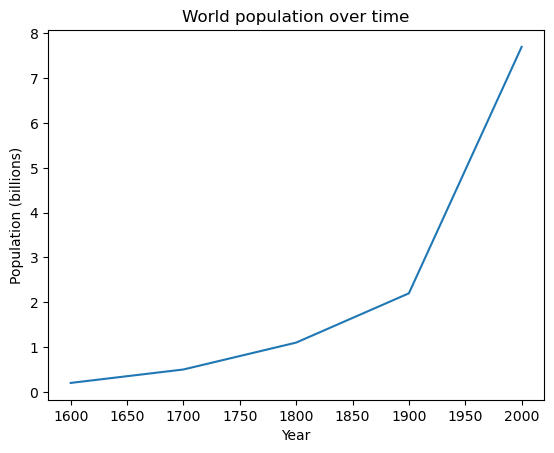

In [79]:
#creating a line ploit using x & y coords

x, y = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]

plt.plot(x, y) #creates the line

plt.title('World population over time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')

plt.show()

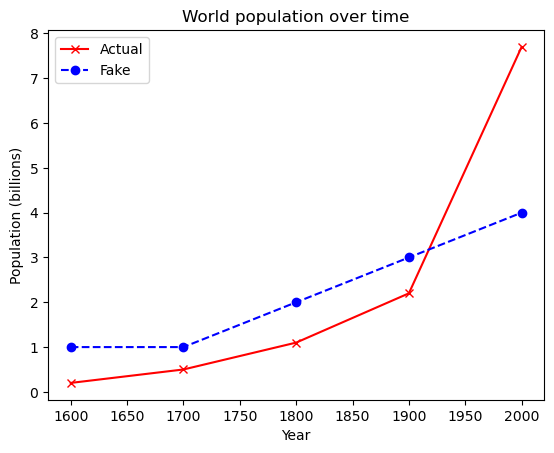

In [81]:
# creating a line plot with multiple lines

x1, y1 = [1600, 1700, 1800, 1900, 2000], [0.2, 0.5, 1.1, 2.2, 7.7]
x2, y2 = [1600, 1700, 1800, 1900, 2000], [1, 1, 2, 3, 4]

plt.plot(x1, y1, 'rx-', label='Actual') #creates a solid red line with x dots
plt.plot(x2, y2, 'bo--', label='Fake') #creates a blue dashed line with circle dots

plt.title('World population over time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.legend() # shows labels in best corner

plt.show()

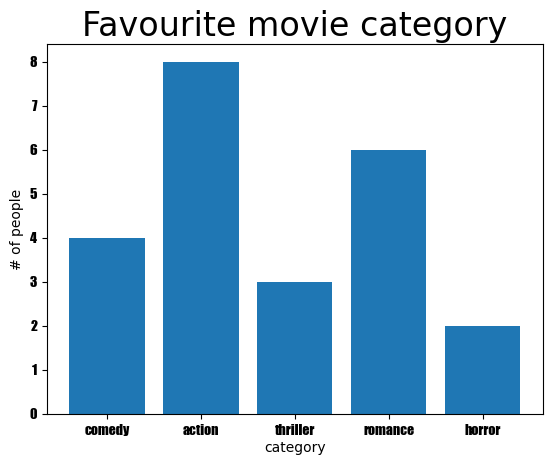

In [83]:
# creating a bar plot using x and y coords

num_people, categories = [4, 8, 3, 6, 2], ['comedy', 'action', 'thriller', 'romance', 'horror']

plt.bar(categories, num_people)

plt.title('Favourite movie category', fontsize=24)
plt.xlabel('category')
plt.ylabel('# of people')
plt.xticks(fontname='Fantasy')
plt.yticks(fontname='Fantasy')

plt.show()

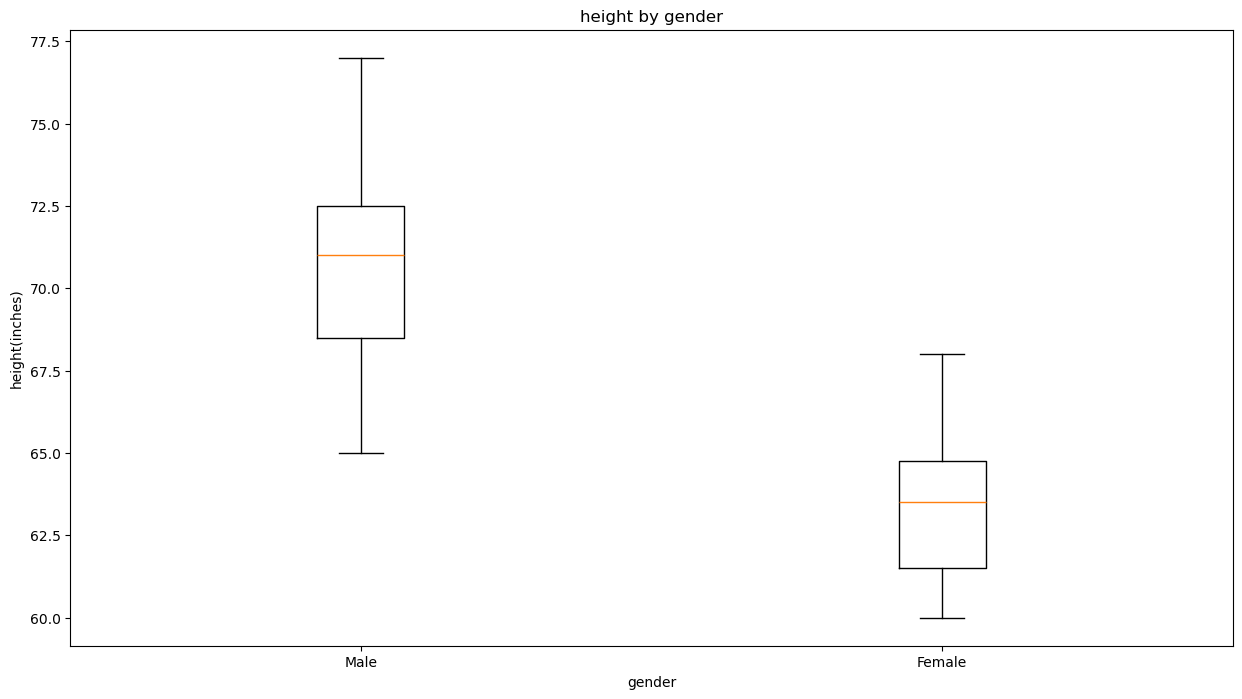

In [85]:
# creating a box plot - showing height data of male-female

males, females = [72, 68, 65, 77, 73, 71, 69], [60, 65, 68, 61, 63, 64]
heights = [males, females]

plt.figure(figsize=(15, 8)) # makes chart bigger
plt.boxplot(heights) # takes in list of data, each box is its' own array, heights contains two lists

plt.xticks([1, 2], ['Male', 'Female'])
plt.title('height by gender')
plt.ylabel('height(inches)')
plt.xlabel('gender')

plt.show()

**Find the reference to other graphs on pgs 288 - 294 in Python bootcamp book**

## Web scraping

In [91]:
#importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

In [17]:
# performing a request and outputting the status code
page = requests.get('https://sarabiatchinyi.com')
print(page)

NameError: name 'requests' is not defined

In [19]:
# outputting the request response content
print(page.content)

NameError: name 'page' is not defined

In [21]:
# turning the response into a beautiful soup object to extract data
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

NameError: name 'BeautifulSoup' is not defined

In [101]:
# using the find method to scrape the text within the first bold tag
title = soup.find('b')
print(title)
print(title.get_text()) # extracts all text within element

<b><legend class="mb-3">Opt in to another list</legend></b>
Opt in to another list


In [103]:
# finding an element by specific attribute key-values

page = requests.get('https://github.com/Connor-SM')
soup = BeautifulSoup(page.content, 'html.parser')

username = soup.find('span', attrs={'class': 'vcard-username'}) # find first span with  this class

print(username)  # will show that element has class of vcard-username among others
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">
          Connor-SM

        </span>

          Connor-SM

        


In [105]:
# traversing through the DOM using beautiful soup - using the children attribute
print(soup.children) # outputs an iterator object

In [107]:
# understanding the children within the soup object
for child in list(soup.children):
    print(type(child))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [109]:
# accessing the .Tag object which holds the html - trying to access the title tag
html = list(soup.children)[2]
for section in html:
    print('\n\n Start of new section')
    print(section)



 Start of new section




In [111]:
# accessing the head element using the children attribute
head = list(html.children)[1]
for item in head:
    print('\n\n New Tag')
    print(item)

AttributeError: 'NavigableString' object has no attribute 'children'

In [113]:
# scraping the title text
title = list(head)[1]
print(title.string) #.string is used to extract text as well
print(type(title.string)) # results in NavigableString
print(title.get_text())

NameError: name 'head' is not defined

**Errors have appeared in the 2 above cells due to the url I have chosen, their is not an issue with the code**

# Friday Project - Website Analysis

In [117]:
# import all necessary libraries
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

In [23]:
# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][ : : -1] # reverses order
    word = [item[0] for item in words][ : : -1] # gets word out of reverses order

    plt.figure( figsize=(20, 10)) # define how large the figure appears

    plt.bar(word, count)

    plt.title('Analysing top words from: {}...'.format(site[ :50]), fontname='Sans Serif', fontsize=24)
    plt.xlabel('Words', fontsize=24)
    plt.ylabel('# of appearances', fontsize=24)
    plt.xticks(fontname='Sans Serif', fontsize=20)
    plt.yticks(fontname='Sans Serif', fontsize=20)

    plt.show()
    
# filter article words and hidden characters
def filterWaste(word):
    bad_words = ('the', 'a', 'in', 'of', 'to', 'you', 'and', '\xa0', 'at', 'on', 'for', 'from', 'is', 'that', 'his',
                 'are', 'be', '-', 'as', '&', 'they', 'with', 'how', 'was', 'her', 'him', 'i', 'has', '|')

    if word.lower() in bad_words:
        return False
    else:
        return True
        
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False

    if isinstance(element, Comment):
        return False

    return True
    
# request site and return top 7 most used words
def scrape(site):
    page = requests.get(site)

    soup = BeautifulSoup(page.content, 'html.parser')

    text = soup.find_all(text=True) # will get all text within the document

    visible_text = filter(filterTags, text)

    word_count = {}

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split('') # replace all hidden chars

        words = list(filter(filterWaste, words))

        for word  in words:
            if word !='': # if it doesn't equal an empty string
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1

    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True) # sort on value

    return word_count[ :7]

# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website(y/n)?') == 'y':
    try:
        clear_output()
        
        site = input('enter a website to analyse: ')

        top_words = scrape(site)

        top_word = top_words[0] # tuple of (word, count)

        print('The top word is: {}'.format(top_word[0]))

        displayResults(top_words, site) # call to graph
    except:
        print('something went wrong, please try again.')

print('Thanks for analysing! Come back again soon')

Would you like to scrape a website(y/n)? y


something went wrong, please try again.


KeyboardInterrupt: Interrupted by user

Enter a website to analyse:  https://sarabiatchinyi.com/


The top word is: design


/var/folders/vz/htssk7r12rv1ympcnkvh0w_40000gn/T/ipykernel_9776/3632641314.py:42: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  text = soup.find_all(text=True)  # will get all text within the document


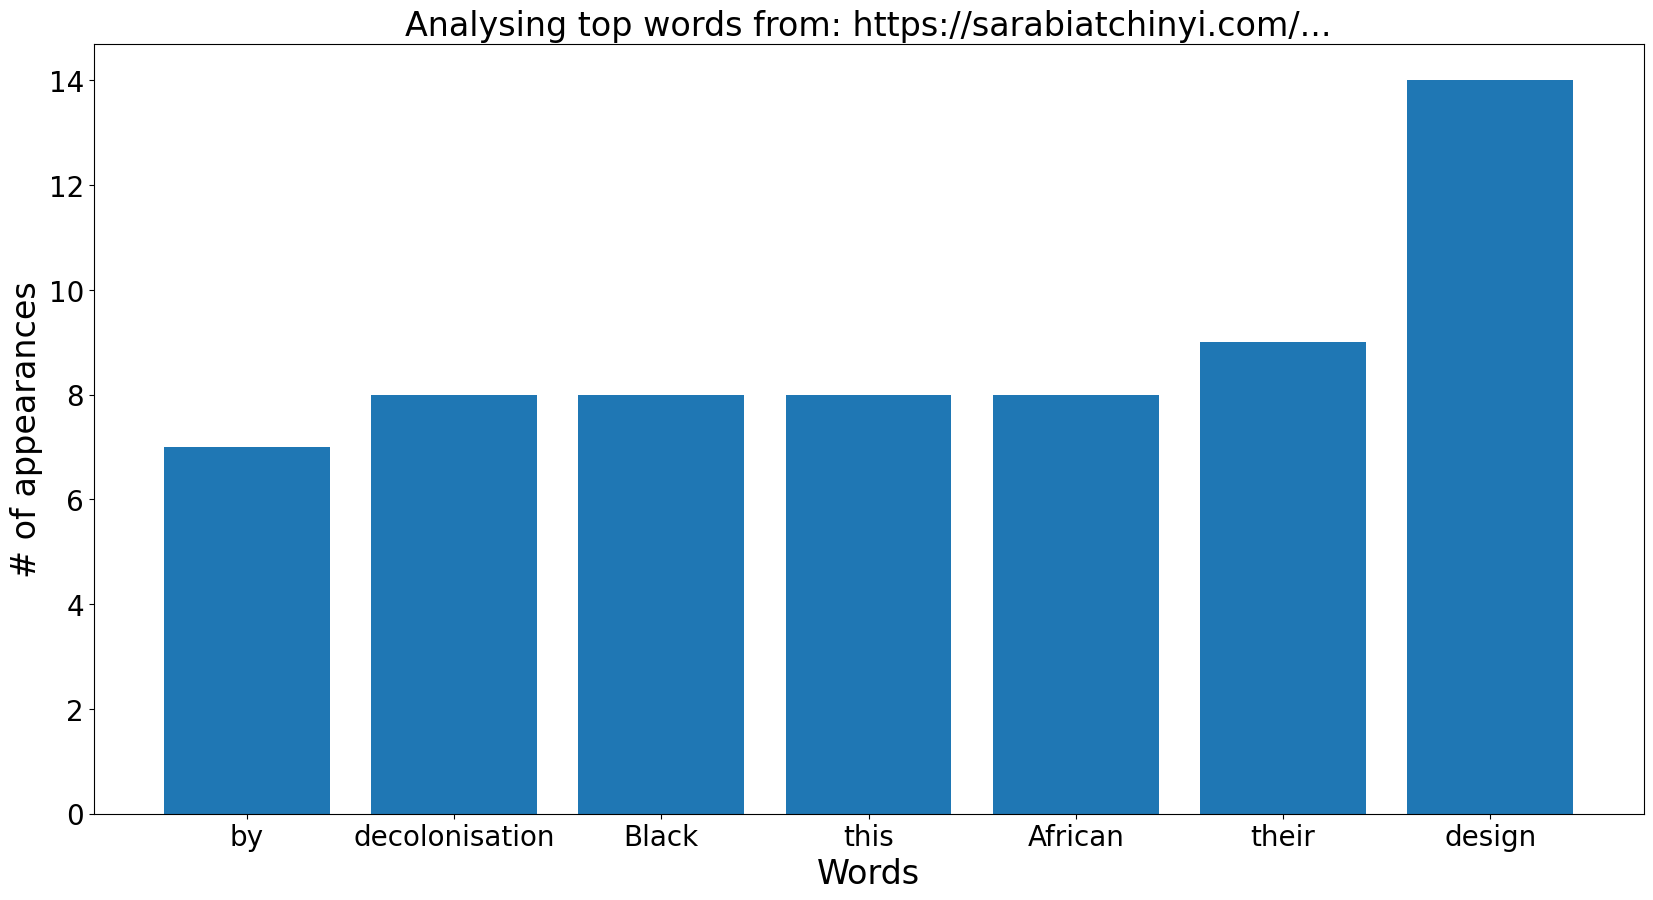

In [ ]:
import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
import matplotlib.pyplot as plt

# graph results of top 7 words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]  # reverses order
    word = [item[0] for item in words][::-1]   # gets word out of reverse order

    plt.figure(figsize=(20, 10))  # define how large the figure appears
    plt.bar(word, count)

    plt.title(f'Analysing top words from: {site[:50]}...', fontname='Sans Serif', fontsize=24)
    plt.xlabel('Words', fontsize=24)
    plt.ylabel('# of appearances', fontsize=24)
    plt.xticks(fontname='Sans Serif', fontsize=20)
    plt.yticks(fontname='Sans Serif', fontsize=20)
    
    plt.show()

# filter article words and hidden characters
def filterWaste(word):
    bad_words = ('the', 'a', 'in', 'of', 'to', 'you', 'and', '\xa0', 'at', 'on', 'for', 'from', 'is', 'that', 'his',
                 'are', 'be', '-', 'as', '&', 'they', 'with', 'how', 'was', 'her', 'him', 'i', 'has', '|', ';')

    return word.lower() not in bad_words

# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

# request site and return top 7 most used words
def scrape(site):
    page = requests.get(site)
    soup = BeautifulSoup(page.content, 'html.parser')

    text = soup.find_all(text=True)  # will get all text within the document
    visible_text = filter(filterTags, text)

    word_count = {}
    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')  # replace all hidden chars and split by space
        words = list(filter(filterWaste, words))

        for word in words:
            if word:  # if it doesn't equal an empty string
                word_count[word] = word_count.get(word, 0) + 1

    word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)  # sort on value
    return word_count[:7]

# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)?') == 'y':
    try:
        from IPython.display import clear_output  # this is only needed if you're using Jupyter notebooks
        clear_output()

        site = input('Enter a website to analyse: ')
        top_words = scrape(site)
        top_word = top_words[0]  # tuple of (word, count)

        print(f'The top word is: {top_word[0]}')
        displayResults(top_words, site)  # call to graph
    except Exception as e:
        print(f'Something went wrong: {e}')

print('Thanks for analysing! Come back again soon.')